# CARGANDO MODELOS Y DATOS


IMPORTAR MODELO RANDOM FOREST Y DATOS

In [2]:
import joblib
import requests
import pandas as pd
import io
###OPTUNA
# URL directa al archivo .pkl
url1 = 'https://raw.githubusercontent.com/Mbenitez11/Prediccion-de-generacin-de-energia-solar-y-analisis-de-fallas/main/results/best_model.pkl'

# Descargar el archivo
response1 = requests.get(url1)

# Cargar el modelo desde el contenido descargado
best_model = joblib.load(io.BytesIO(response1.content))

###GRID SEARCH
# URL directa al archivo .pkl
url2 = 'https://raw.githubusercontent.com/Mbenitez11/Prediccion-de-generacin-de-energia-solar-y-analisis-de-fallas/main/results/best_model_grid.pkl'

# Descargar el archivo
response2 = requests.get(url2)

# Cargar el modelo desde el contenido descargado
best_model_grid = joblib.load(io.BytesIO(response2.content))


###RANDOM FOREST SIN OPTIMIZACION DE HIPERPARAMETROS
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()



In [3]:
# Cargar los datos

url_X_train='https://github.com/Mbenitez11/Prediccion-de-generacin-de-energia-solar-y-analisis-de-fallas/raw/refs/heads/main/results/X_train.pkl'
url_X_test='https://github.com/Mbenitez11/Prediccion-de-generacin-de-energia-solar-y-analisis-de-fallas/raw/refs/heads/main/results/X_test.pkl'
url_y_train='https://github.com/Mbenitez11/Prediccion-de-generacin-de-energia-solar-y-analisis-de-fallas/raw/refs/heads/main/results/y_train.pkl'
url_y_test='https://github.com/Mbenitez11/Prediccion-de-generacin-de-energia-solar-y-analisis-de-fallas/raw/refs/heads/main/results/y_test.pkl'
url_X1='https://github.com/Mbenitez11/Prediccion-de-generacin-de-energia-solar-y-analisis-de-fallas/raw/refs/heads/main/results/X1.pkl'
url_y1='https://github.com/Mbenitez11/Prediccion-de-generacin-de-energia-solar-y-analisis-de-fallas/raw/refs/heads/main/results/y1.pkl'

response1= requests.get(url_X_train)
response2=requests.get(url_X_test)
response3=requests.get(url_y_train)
response4=requests.get(url_y_test)
response5= requests.get(url_X1)
response6=requests.get(url_y1)

X_train = joblib.load(io.BytesIO(response1.content))
X_test = joblib.load(io.BytesIO(response2.content))
y_train = joblib.load(io.BytesIO(response3.content))
y_test = joblib.load(io.BytesIO(response4.content))
X1 = joblib.load(io.BytesIO(response5.content))
y1 = joblib.load(io.BytesIO(response6.content))

In [4]:
rfr.fit(X_train,y_train)

RandomForestRegressor()

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [6]:
prediction_normal=rfr.predict(X_test)
prediction_optuna = best_model.predict(X_test)
prediction_grid = best_model_grid.predict(X_test)

In [7]:
cross_checking = pd.DataFrame({'Actual' : y_test , 'Predicted_normal' : prediction_normal, 'Predicted_optuna' : prediction_optuna, 'Predicted_grid' : prediction_grid})
cross_checking.iloc[1000:1005]

,Actual,Predicted_normal,Predicted_optuna,Predicted_grid
63890,349.987500,354.519054,349.857783,346.305745
20839,0.000000,0.000000,0.000000,0.000000
45993,0.000000,0.000000,0.000000,0.000000
66622,0.000000,0.000000,0.000000,0.000000
26178,720.157143,674.494964,673.976129,669.424512


In [8]:

# Crear una columna de error con las condiciones especificadas
cross_checking['Error_normal'] = np.where(
    (cross_checking['Actual'] == 0) & (cross_checking['Actual'] - cross_checking['Predicted_normal'] == 0),
    0,
    np.where(
        (cross_checking['Actual'] == 0) & (cross_checking['Actual'] - cross_checking['Predicted_normal'] != 0),
        np.nan, # Reemplaza "Probablemente Apagado" con np.nan
        abs(cross_checking['Actual'] - cross_checking['Predicted_normal']) * 100 / cross_checking['Actual']
    )
)

cross_checking['Error_optuna'] = np.where(
    (cross_checking['Actual'] == 0) & (cross_checking['Actual'] - cross_checking['Predicted_optuna'] == 0),
    0,
    np.where(
        (cross_checking['Actual'] == 0) & (cross_checking['Actual'] - cross_checking['Predicted_optuna'] != 0),
        np.nan, # Reemplaza "Probablemente Apagado" con np.nan
        abs(cross_checking['Actual'] - cross_checking['Predicted_optuna']) * 100 / cross_checking['Actual']
    )
)

cross_checking['Error_grid'] = np.where(
    (cross_checking['Actual'] == 0) & (cross_checking['Actual'] - cross_checking['Predicted_grid'] == 0),
    0,
    np.where(
        (cross_checking['Actual'] == 0) & (cross_checking['Actual'] - cross_checking['Predicted_grid'] != 0),
        np.nan, # Reemplaza "Probablemente Apagado" con np.nan
        abs(cross_checking['Actual'] - cross_checking['Predicted_grid']) * 100 / cross_checking['Actual']
    )
)


# Aplicar formato de estilo con un gradiente de color personalizado para resaltar errores altos en rojo
cross_checking.sample(25).style.background_gradient(
    cmap='coolwarm', subset=['Error_normal', 'Error_optuna', 'Error_grid']
).set_properties(**{
    'font-family': 'Lucida Calligraphy',
    'color': 'DarkBlack',
    'font-size': '15px'
})

,Actual,Predicted_normal,Predicted_optuna,Predicted_grid,Error_normal,Error_optuna,Error_grid
16719,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
62271,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
14401,644.542857,867.548000,848.361312,849.297827,34.598963,31.622173,31.767472
41268,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
14353,881.057143,885.172946,891.228059,903.074309,0.467144,1.154399,2.498949
17813,422.062500,413.751339,410.489123,413.213286,1.969178,2.742100,2.096660
54429,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
64763,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
14740,28.714286,27.859375,29.559107,29.985409,2.977301,2.942164,4.426797
49277,45.562500,45.064107,43.322917,44.928175,1.093866,4.915409,1.392209


In [10]:
X_test.head()

,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
27698,1213.142857,7284250.143,25.623183,47.156502,0.485175
26433,3732.750000,6285194.750,31.312459,59.503814,1.009763
18516,7470.625000,7279802.625,32.816960,40.095430,0.214468
28514,8150.000000,6636066.000,26.251811,24.422852,0.000000
434,0.000000,7098099.000,24.177106,22.551908,0.000000


In [15]:
cross_checking['IRRADIATION']=X_test['IRRADIATION']
cross_checking['MODULE_TEMPERATURE']=X_test['MODULE_TEMPERATURE']
cross_checking['AMBIENT_TEMPERATURE']=X_test['AMBIENT_TEMPERATURE']


In [17]:
cross_checking[['Actual','IRRADIATION','MODULE_TEMPERATURE','AMBIENT_TEMPERATURE','Error_normal', 'Error_optuna', 'Error_grid']].sample(25).style.background_gradient(
    cmap='coolwarm', subset=['Error_normal', 'Error_optuna', 'Error_grid']
).set_properties(**{
    'font-family': 'Lucida Calligraphy',
    'color': 'DarkBlack',
    'font-size': '15px'
})

,Actual,IRRADIATION,MODULE_TEMPERATURE,AMBIENT_TEMPERATURE,Error_normal,Error_optuna,Error_grid
50075,0.000000,0.000000,19.418463,21.341252,0.000000,0.000000,0.000000
17179,0.000000,0.000000,21.633982,24.327403,0.000000,0.000000,0.000000
52799,702.957143,0.480099,38.266939,27.128528,2.145231,1.345321,1.934311
44706,443.875000,0.318240,45.094606,29.198299,9.409333,7.265035,3.877419
7103,861.628571,0.593244,45.970447,26.840597,0.802314,1.539789,1.431097
18352,1175.700000,0.847598,57.527476,33.321887,0.267831,0.468376,0.049565
63997,125.671429,0.085962,29.026457,26.740639,0.787925,1.382732,3.200026
47037,484.175000,0.353803,37.113145,29.173793,5.399494,1.859450,5.176138
58914,401.714286,0.341202,32.628933,24.221519,2.780112,3.339557,4.132235
27071,0.000000,0.001264,27.983899,28.561310,0.000000,0.000000,0.000000


# **GRAFICAS**

Grafico de Dispersion

<ipython-input-94-0c1938f5fa63>:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([cross_checking['Actual'].min(), cross_checking['Actual'].max()],


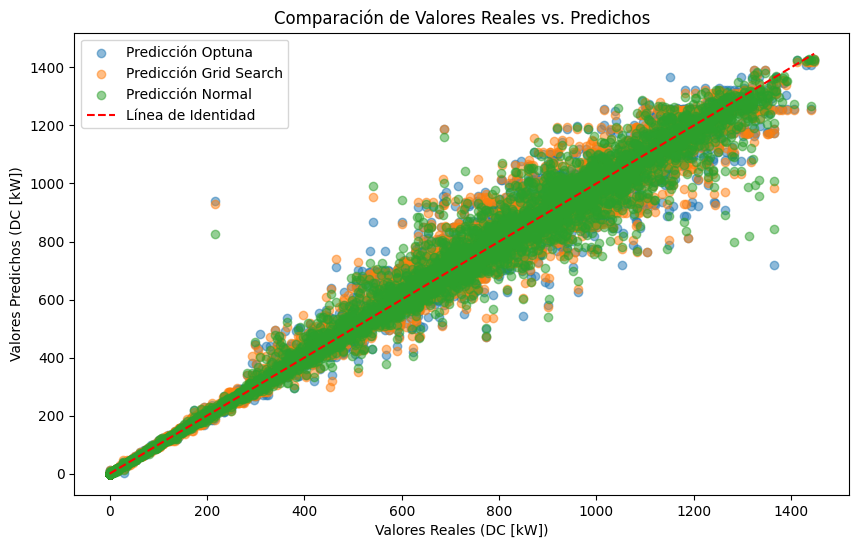

In [94]:

plt.figure(figsize=(10, 6))

plt.scatter(cross_checking['Actual'], cross_checking['Predicted_optuna'], alpha=0.5, label='Predicción Optuna')
plt.scatter(cross_checking['Actual'], cross_checking['Predicted_grid'], alpha=0.5, label='Predicción Grid Search')
plt.scatter(cross_checking['Actual'], cross_checking['Predicted_normal'], alpha=0.5, label='Predicción Normal')
plt.plot([cross_checking['Actual'].min(), cross_checking['Actual'].max()],
         [cross_checking['Actual'].min(), cross_checking['Actual'].max()],
         'k--', color='red', label='Línea de Identidad')
plt.xlabel('Valores Reales (DC [kW])')
plt.ylabel('Valores Predichos (DC [kW])')
plt.legend()
plt.title('Comparación de Valores Reales vs. Predichos')
plt.show()


Histograma de errores

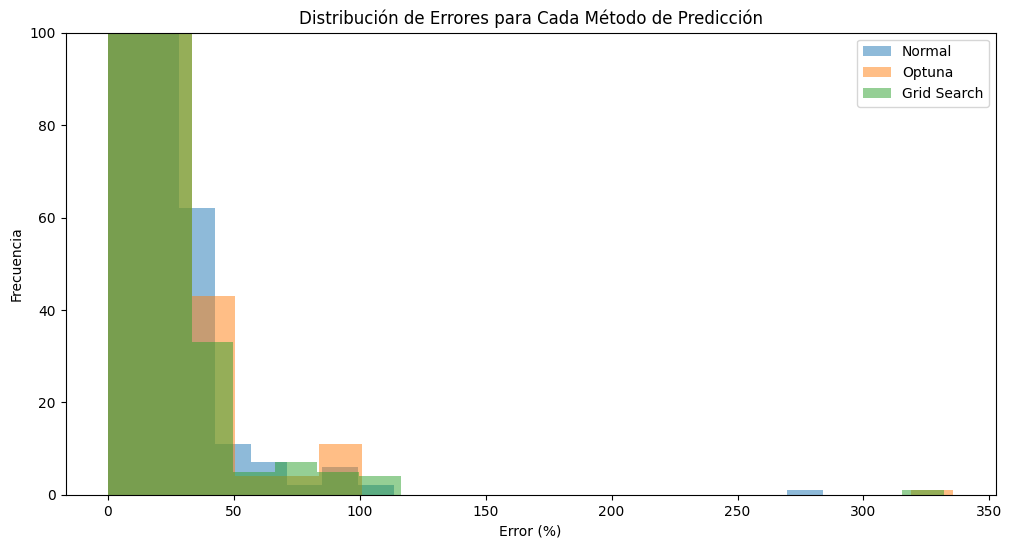

In [64]:
plt.figure(figsize=(12, 6))
plt.hist(cross_checking['Error_normal'], bins=20, alpha=0.5, label='Normal')
plt.hist(cross_checking['Error_optuna'], bins=20, alpha=0.5, label='Optuna')
plt.hist(cross_checking['Error_grid'], bins=20, alpha=0.5, label='Grid Search')
plt.ylim(0, 100)  # Escala de 0 a 100 para el eje Y
plt.xlabel('Error (%)')
plt.ylabel('Frecuencia')
plt.title('Distribución de Errores para Cada Método de Predicción')
plt.legend()
plt.show()


Gráfico de Barras Comparativo

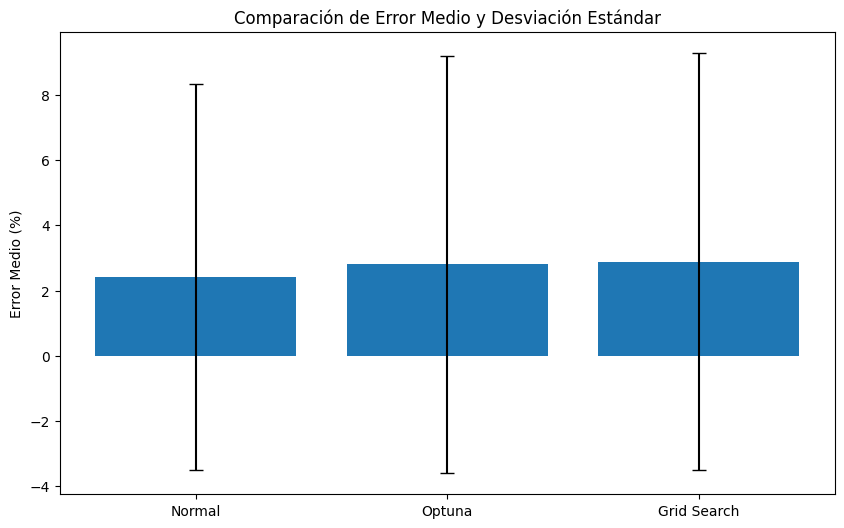

In [68]:

# Calcular la media y desviación estándar de los errores
mean_errors = [cross_checking['Error_normal'].mean(), cross_checking['Error_optuna'].mean(), cross_checking['Error_grid'].mean()]
std_errors = [cross_checking['Error_normal'].std(), cross_checking['Error_optuna'].std(), cross_checking['Error_grid'].std()]

# Crear el gráfico de barras con barras de error
plt.figure(figsize=(10, 6))
plt.bar(['Normal', 'Optuna', 'Grid Search'], mean_errors, yerr=std_errors, capsize=5)
plt.ylabel('Error Medio (%)')
plt.title('Comparación de Error Medio y Desviación Estándar')
plt.show()


Scatter Plot

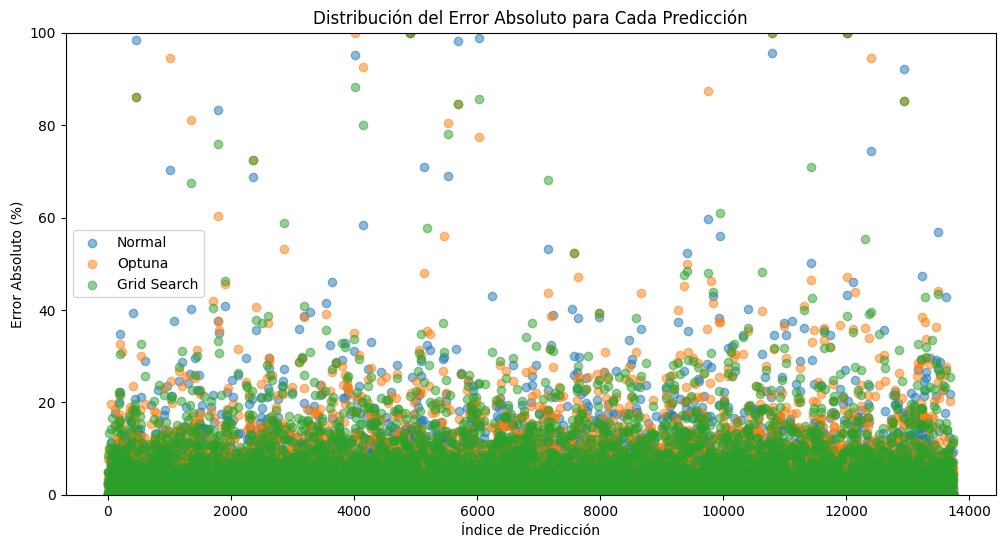

In [69]:
plt.figure(figsize=(12, 6))
plt.scatter(range(len(cross_checking['Error_normal'])), abs(cross_checking['Error_normal']), alpha=0.5, label='Normal')
plt.scatter(range(len(cross_checking['Error_optuna'])), abs(cross_checking['Error_optuna']), alpha=0.5, label='Optuna')
plt.scatter(range(len(cross_checking['Error_grid'])), abs(cross_checking['Error_grid']), alpha=0.5, label='Grid Search')
plt.ylim(0, 100)
plt.xlabel('Índice de Predicción')
plt.ylabel('Error Absoluto (%)')
plt.title('Distribución del Error Absoluto para Cada Predicción')
plt.legend()
plt.show()


Violin Plot

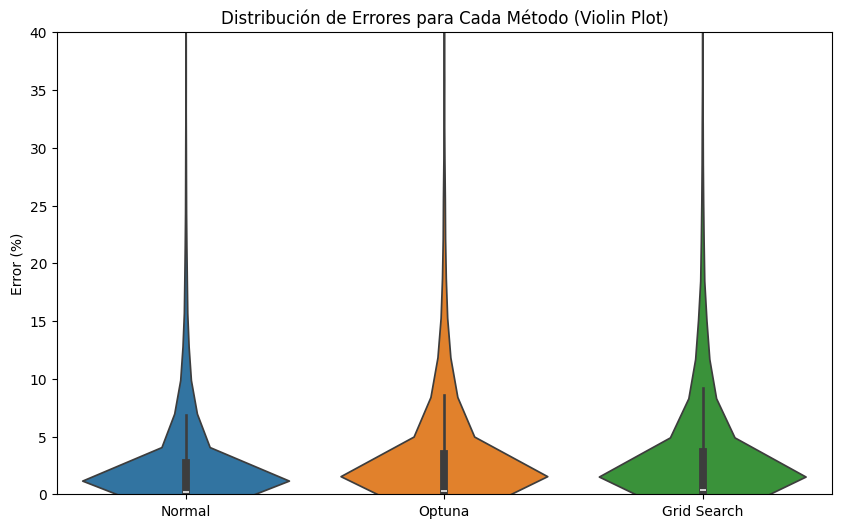

In [71]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.violinplot(data=[cross_checking['Error_normal'], cross_checking['Error_optuna'], cross_checking['Error_grid']])
plt.xticks([0, 1, 2], ['Normal', 'Optuna', 'Grid Search'])
plt.ylim(0, 40)
plt.ylabel('Error (%)')
plt.title('Distribución de Errores para Cada Método (Violin Plot)')
plt.show()


Gráfico KDE

<ipython-input-82-c3de9ac2f393>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(cross_checking['Error_normal'], label='Normal', shade=True)
<ipython-input-82-c3de9ac2f393>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(cross_checking['Error_optuna'], label='Optuna', shade=True)
<ipython-input-82-c3de9ac2f393>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(cross_checking['Error_grid'], label='Grid Search', shade=True)


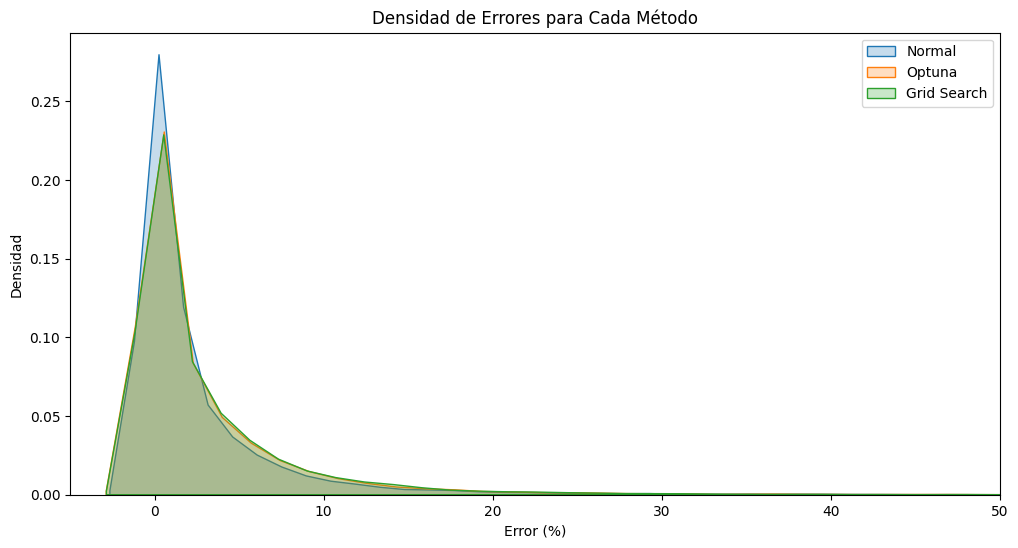

In [82]:
plt.figure(figsize=(12, 6))
sns.kdeplot(cross_checking['Error_normal'], label='Normal', shade=True)
sns.kdeplot(cross_checking['Error_optuna'], label='Optuna', shade=True)
sns.kdeplot(cross_checking['Error_grid'], label='Grid Search', shade=True)
plt.xlim(-5, 50)
plt.xlabel('Error (%)')
plt.ylabel('Densidad')
plt.title('Densidad de Errores para Cada Método')
plt.legend()
plt.show()


Grafico CDF

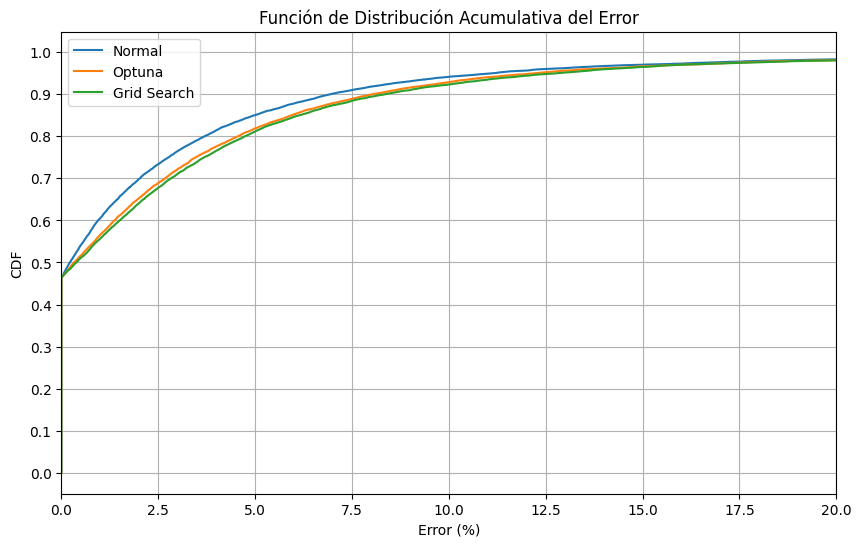

In [92]:


plt.figure(figsize=(10, 6))
for errors, label in zip([cross_checking['Error_normal'], cross_checking['Error_optuna'], cross_checking['Error_grid']],
                         ['Normal', 'Optuna', 'Grid Search']):
    sorted_errors = np.sort(errors)
    yvals = np.arange(len(sorted_errors)) / float(len(sorted_errors))
    plt.plot(sorted_errors, yvals, label=label)
plt.xlim(0, 20)
plt.xlabel('Error (%)')
plt.ylabel('CDF')
plt.title('Función de Distribución Acumulativa del Error')
plt.legend()


plt.yticks(np.arange(0, 1.1, 0.1))  # Cambia el rango y los intervalos del eje y
plt.grid(True)
plt.show()


# Sección nueva